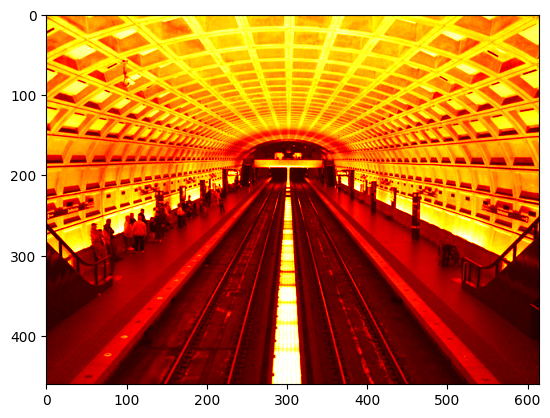

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

img = plt.imread('./Filter_image/dc_metro.png')

plt.imshow(img, cmap=plt.cm.hot)
plt.show()

In [52]:
img.shape

(461, 615)

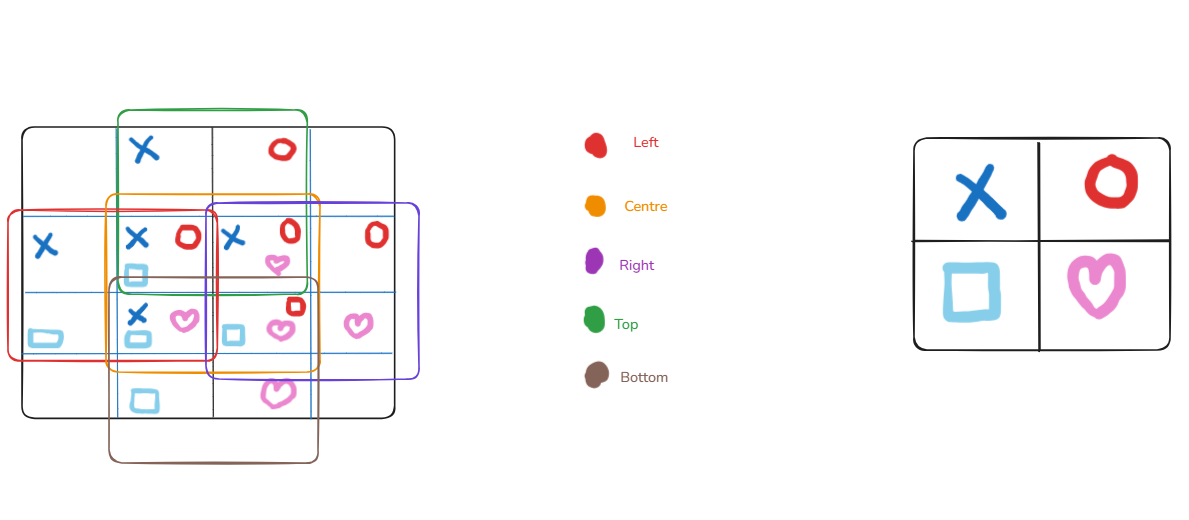

In [53]:
Image(filename='./Image/Slicing.PNG')

### Short Explanation on a 4×4 Image Smoothing

#### NB: In slicing, we can replace fixed values like 3 with -1 to make the code more general.
#### For example: img[1:3, 1:3] can be written as img[1:-1, 1:-1]
#### This is especially useful for handling images of different sizes.



#### Top    = img[0:2 , 1:3] 
#### Left   = img[1:3 , 0:2]
#### Right  = img[1:3 , 2: ]
#### Centre = img[1:3 , 1:3]
#### Bottom = img[2:  , 1:3]

#### Blurred = (Top + Left + Right + Centre + Bottom) / 5

Text(0.5, 1.0, 'difference')

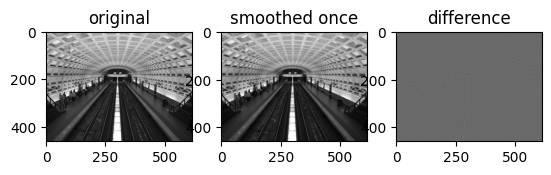

In [61]:
def smooth(img):
    avg_img = (
        img[1:-1, 1:-1] +  # center
        img[:-2, 1:-1] +   # top
        img[2:, 1:-1] +    # bottom
        img[1:-1, :-2] +   # left
        img[1:-1, 2:]      # right
    ) / 5.0
    return avg_img

def smooth_loop(img):
    smoothed = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for r in range(0, img.shape[0]-2):
        for c in range(0, img.shape[1]-2):
            smoothed[r, c] = (
                img[r+1, c+1] +  # center
                img[r, c+1] +    # top
                img[r+2, c+1] +  # bottom
                img[r+1, c] +    # left
                img[r+1, c+2]    # right
            ) / 5.0
    return smoothed

img = plt.imread('./Filter_image/dc_metro.png')
avg_img = smooth(img)

# Set colormap so that images are plotted in gray scale.
plt.figure()
plt.gray()

# Plot the original image first
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,3,2)
plt.imshow(avg_img)
plt.title('smoothed once')

# And finally the difference between the two.
plt.subplot(1,3,3)
plt.imshow(img[1:-1,1:-1] - avg_img) 
plt.title('difference')

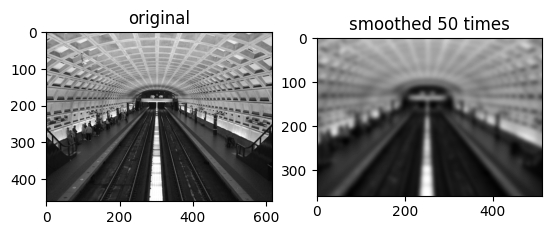

In [57]:
# Bonus: Re-filter the image by passing the result image
#        through the filter again.  Do this 50 times and plot
#        the resulting image.

for num in range(50):
    avg_img = smooth(avg_img)

# Plot the original image first
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed 50 times')

assert np.allclose(smooth(img), smooth_loop(img))

plt.show()
